In [1]:
import tensorflow as tf
import os.path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imghdr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [63]:
data_dir = r"C:\Users\Vinnie\Documents\Data2\COVID"

In [64]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [65]:
os.listdir(r"C:\Users\Vinnie\Documents\Data2\COVID")

['images', 'Pneumonia_Images']

In [66]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [67]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [68]:
Data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\Vinnie\Documents\Data2\COVID")

Found 4961 files belonging to 2 classes.


In [69]:
Data_iterator = Data.as_numpy_iterator()

In [70]:
batch = Data_iterator.next()

In [71]:
len(batch)

2

In [72]:
batch[0].shape

(32, 256, 256, 3)

In [73]:
batch[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

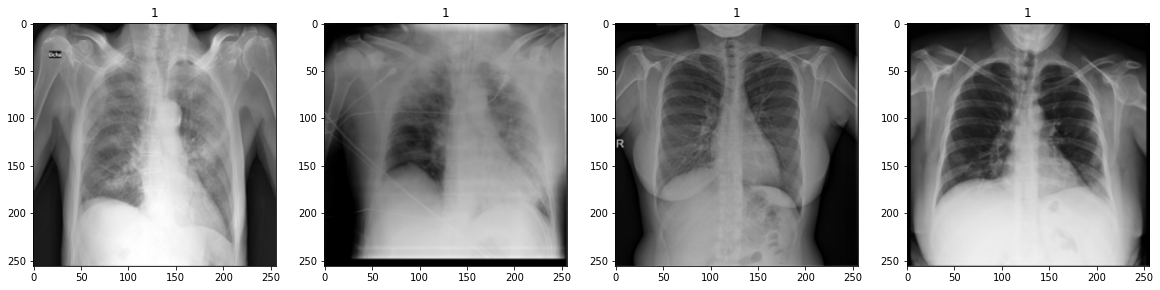

In [74]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [75]:
scaled = batch[0] / 255

In [76]:
scaled.max()

1.0

In [77]:
Data = Data.map(lambda x,y: (x/255, y))

In [78]:
scaled_iterator = Data.as_numpy_iterator()

In [79]:
batch = scaled_iterator.next()

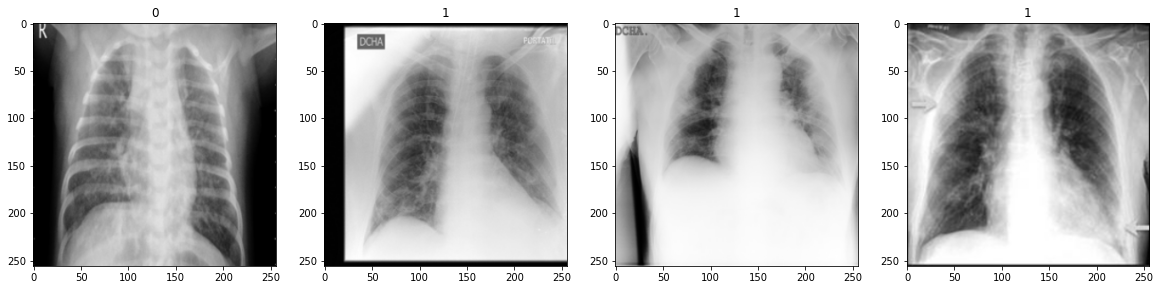

In [80]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [81]:
len(Data)

156

In [82]:
1323*.7

926.0999999999999

In [83]:
train_size = int(len(Data)*.7)
val_size = int(len(Data)*.2)
test_size = int(len(Data)*.1)

In [84]:
train_size

109

In [85]:
val_size

31

In [86]:
test_size

15

In [87]:
train = Data.take(train_size)
val = Data.skip(train_size).take(val_size)
test = Data.skip(train_size+val_size).take(test_size)

In [88]:
model = Sequential()

In [89]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [90]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [92]:
logdir='logs'

In [93]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [94]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
109/109 [==============================] - 67s 606ms/step - loss: 0.1510 - accuracy: 0.9401 - val_loss: 0.0638 - val_accuracy: 0.9778
Epoch 2/20
109/109 [==============================] - 67s 609ms/step - loss: 0.0718 - accuracy: 0.9748 - val_loss: 0.0545 - val_accuracy: 0.9849
Epoch 3/20
109/109 [==============================] - 67s 608ms/step - loss: 0.0584 - accuracy: 0.9805 - val_loss: 0.0385 - val_accuracy: 0.9849
Epoch 4/20
109/109 [==============================] - 67s 611ms/step - loss: 0.0482 - accuracy: 0.9842 - val_loss: 0.0416 - val_accuracy: 0.9849
Epoch 5/20
109/109 [==============================] - 67s 613ms/step - loss: 0.0373 - accuracy: 0.9877 - val_loss: 0.0520 - val_accuracy: 0.9829
Epoch 6/20
109/109 [==============================] - 68s 616ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0479 - val_accuracy: 0.9879
Epoch 7/20
109/109 [==============================] - 68s 617ms/step - loss: 0.0322 - accuracy: 0.9885 - val_loss: 0.0944 - val_ac

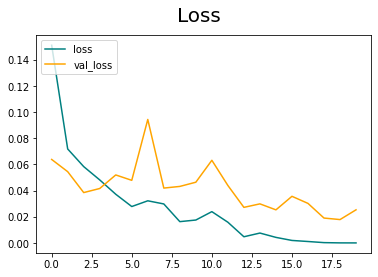

In [95]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

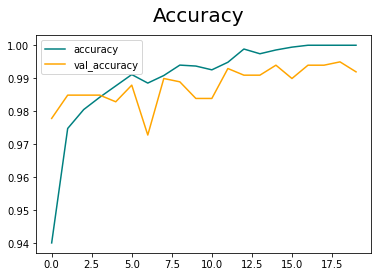

In [96]:

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()